In [27]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm.notebook import tqdm

In [28]:
def choose_action(Q, S, epsilon):
    n_actions = 3
    if np.random.rand() < epsilon:
        action = np.random.randint(n_actions)             # Random action
    else:
        action = np.argmax(Q[S[0], S[1]])
    return action

In [35]:
def q_lambda(env, alpha=0.1, gamma=0.9, epsilon=0.1, num_ep=int(1e4), lamb = 0.1):
    # Size of discretized state space
    n_states = 20  
    n_actions = env.action_space.n  

    # Initialize Q table
    Q = np.random.uniform(low = 0, high = 1, size = (n_states, n_states, n_actions))
    # Initialize eligibility traces:
    e = np.zeros((n_states,n_states, n_actions))

    policy = np.random.randint(n_actions, size=(n_states, n_states))             # Random policy

    interval = (env.observation_space.high - env.observation_space.low) / n_states
    high = env.observation_space.high
    low  = env.observation_space.low

    total_episode_length = []
    reward_list = []
    avg_reward_list = []
    successes = 0

    for ep in tqdm(range(num_ep)):      
        S = env.reset()
        S = [int(s) for s in np.floor((S - low) / interval)]

        done = False
        t = 0
        
        action = choose_action(Q, S, epsilon)
        
        while not done or t<=200:
            S_, R, done, _ = env.step(action)
            S_ = [int(s) for s in np.floor((S_ - low) / interval)]
            e = (gamma * lamb * e)
            e[S[0] , S[1], action] += 1 
            next_action = choose_action(Q, S_, epsilon)

            td_error = R + gamma * Q[S_[0],S_[1], next_action] - Q[S[0] , S[1], action]
            Q +=  (alpha * td_error * e)
            
            t += 1
            action = next_action
            if R>0:
                print("Reward:", R)
                successes += 0

        total_episode_length.append(t)
        
        avg_episode_length = np.mean(total_episode_length)

        if (ep+1) % num_ep == 0 :
            V = np.max(Q, axis = 2)
            print('Episode {} || Avg Timestep: {} || Lambda: {}'.format(ep+1, avg_episode_length, lamb))
            total_episode_length = []
            plt.imshow(V)
            plt.colorbar()
            plt.show()




    #avg_ep_length = (total_episode_length/num_ep) 
    #print("N =",n," ||  α = {:.2f}".format(alpha)," || Avg. Episode_length =",avg_ep_length)
    return successes, avg_episode_length

Episode 500 || Avg Timestep: 201.0 || Lambda: 0.0


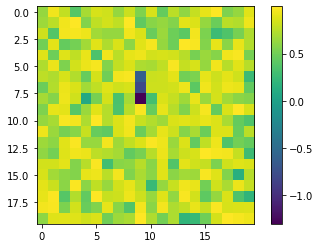

Episode 500 || Avg Timestep: 201.0 || Lambda: 0.1111111111111111


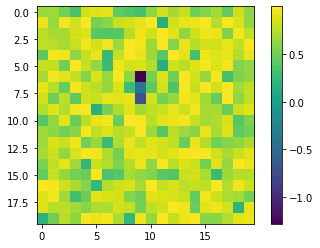

Episode 500 || Avg Timestep: 201.0 || Lambda: 0.2222222222222222


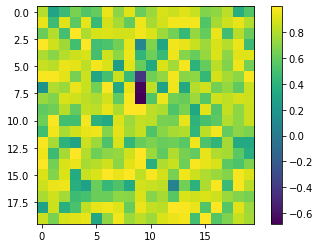

Episode 500 || Avg Timestep: 201.0 || Lambda: 0.3333333333333333


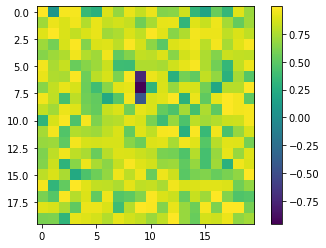

Episode 500 || Avg Timestep: 201.0 || Lambda: 0.4444444444444444


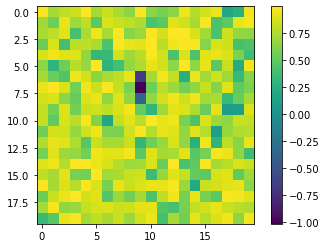

Episode 500 || Avg Timestep: 201.0 || Lambda: 0.5555555555555556


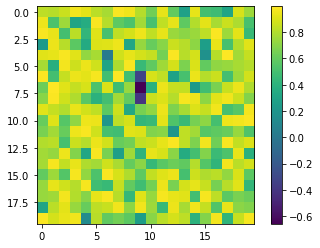

Episode 500 || Avg Timestep: 201.0 || Lambda: 0.6666666666666666


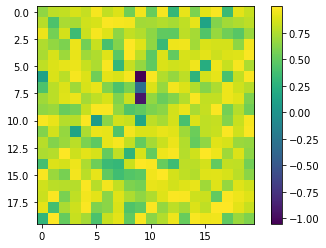

Episode 500 || Avg Timestep: 201.0 || Lambda: 0.7777777777777777


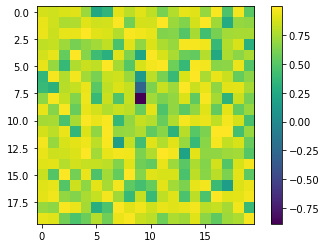

Episode 500 || Avg Timestep: 201.0 || Lambda: 0.8888888888888888


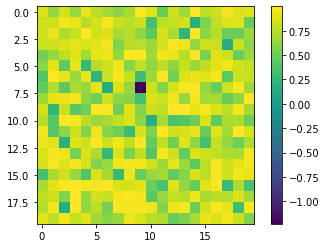

Episode 500 || Avg Timestep: 201.0 || Lambda: 1.0


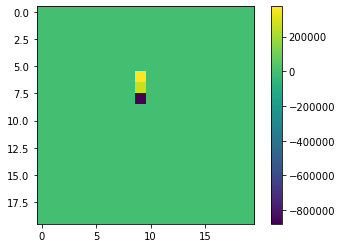

ValueError: x and y must have same first dimension, but have shapes (1,) and (10,)

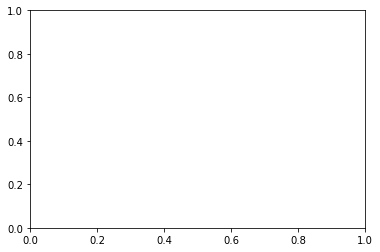

In [36]:
env = gym.make('MountainCar-v0')
env.reset()
lamb = np.linspace(0, 1, 10)
el = []
succ = []
for lam in lamb:
    success, length = q_lambda(env, alpha=0.1, gamma=0.9, epsilon=0.5, num_ep=int(500), lamb = lam)
    succ.append(success)
    el.append(length)
plt.plot(success, range(10))
plt.plot(el, range(10))
plt.show()

ValueError: x and y must have same first dimension, but have shapes (10,) and (1, 10)

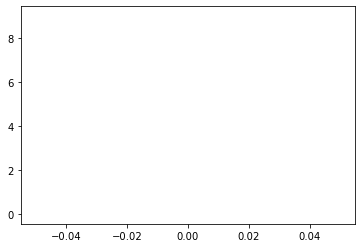

In [38]:
plt.plot(success, np.array(range(10)).reshape([1,10]))
plt.plot(el, np.array(range(10)).reshape([1,10]))
plt.show()